Analisis dasar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import PercentFormatter

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
df = pd.read_csv('cleaned_processed_final.csv')

In [4]:
# Mengubah Nama Fitur
# Definisi kamus (mapping)
rename_mapping = {
    'Timestamp': 'Timestamp',
    'Usia': 'age',
    'JK': 'gender',
    'Sekolah': 'school',
    'Kelas': 'grade_level',
    'Jumlah uang bulanan': 'monthly_allowance',
    'Total pengeluaran dalam satu bulan': 'monthly_total_spending',
    'Seberapa besar pengaruh teman-teman Anda dalam pengambilan keputusan sehari-hari (contohnya dalam memilih pakaian, tempat nongkrong dan barang yang ingin dibeli)?': 'Peer_influance_decision',
    'Seberapa besar rasa takut Anda merasa ditolak dalam pertemanan jika dianggap ketinggalan tren atau tidak mengikuti gaya teman-teman Anda?': 'fear_of_rejection',
    'Seberapa sering Anda membeli suatu barang karena diajak atau dipengaruhi oleh teman Anda, bukan karena kebutuhan pribadi?': 'peer_influenced_buying',
    'Dalam seminggu berapa kali Anda biasanya keluar untuk nongkrong  bersama teman?': 'hangout_frequency',
    'Media sosial yang sering digunakan': 'most_used_social_media',
    'Lama rata-rata Anda menggunakan media sosial': 'daily_social_media_hours',
    'Seberapa besar pengaruh rekomendasi influencer terhadap pilihan belanja atau gaya hidup Anda?': 'influencer_impact',
    'Dalam satu bulan, berapa kali Anda melakukan pembelian melalui platform belanja online seperti Shopee, Tokopedia dan Tiktok Shop?': 'online_shopping_frequency',
    'Seberapa sering Anda makan atau membeli jajanan diluar rumah dalam seminggu?': 'eating_out_frequency',
    'Seberapa sering Anda membeli barang dalam satu bulan (termasuk jajan, nongkrong, belanja dan kebutuhan lainnya)?': 'freq_total_purchase_monthly',
    'Seberapa sering Anda membeli barang secara spontan tanpa perencanaan sebelumnya (impulsive buying)?': 'freq_impulsive_buying',
    'Saya merasa perlu membeli barang-barang yang sedang tren agar saya dapat diterima dalam kelompok pertemanan saya': 'attitude_need_trend_acceptance',
    'Sebagian besar uang saku saya habis karena kegiatan bersama teman, seperti nongkrong, makan diluar atau mengikuti tren lain?': 'attitude_money_spent_on_peers',
    'Saya sering merasa terdorong untuk mencoba tempat-tempat yang sedang viral, meskipun sebenarnya tempat tersebut tidak terlalu menarik bagi saya': 'attitude_driven_by_viral',
    'Saya sering merasa terdorong untuk mencoba tempat-tempat yang sedang tren di media sosial karena banyak teman saya yang melakukannya': 'trend_place_pressure',
    'Saya rela mengurangi atau menghemat uang makan dan transportasi agar bisa membeli barang atau mengikuti tren yang sedang populer di sekolah': 'saving_for_trend',
    'Frekuensi saya nongkrong di kafe atau tempat hangout tertentu meningkat karena sering diajak atau dipengaruhi oleh teman':'hangout_increase_friends',
    'Rasio_Pengeluaran':'spending_ratio',
    'Status_Keuangan':'financial_status'
}

# Menerapkan perubahan nama kolom
df = df.rename(columns=rename_mapping)

# Memverifikasi hasilnya dengan menampilkan daftar kolom baru
print("Daftar Nama Fitur Setelah Rename")
print(df.columns.tolist())

Daftar Nama Fitur Setelah Rename
['Timestamp', 'age', 'gender', 'school', 'grade_level', 'monthly_allowance', 'Peer_influance_decision', 'fear_of_rejection', 'peer_influenced_buying', 'hangout_frequency', 'most_used_social_media', 'daily_social_media_hours', 'influencer_impact', 'online_shopping_frequency', 'eating_out_frequency', 'monthly_total_spending', 'freq_total_purchase_monthly', 'freq_impulsive_buying', 'attitude_need_trend_acceptance', 'attitude_money_spent_on_peers', 'trend_place_pressure', 'saving_for_trend', 'hangout_increase_friends', 'Sekolah_Clean', 'spending_ratio', 'financial_status', 'Medsoc_Discord', 'Medsoc_Facebook', 'Medsoc_Instagram', 'Medsoc_Line', 'Medsoc_Pinterest', 'Medsoc_Talkin', 'Medsoc_Telegram', 'Medsoc_Threads', 'Medsoc_Tidak Ada', 'Medsoc_TikTok', 'Medsoc_Twitter/X', 'Medsoc_VK', 'Medsoc_WeChat', 'Medsoc_WhatsApp', 'Medsoc_Yeetalk', 'Medsoc_YouTube']


In [5]:
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
                 Timestamp   age     gender            school grade_level  \
0  2025-11-26 08:51:25.968  18.0  Laki-laki  SMA N 1 LAGUBOTI         XII   
1  2025-11-26 08:51:44.569  17.0  Perempuan  SMA N 1 LAGUBOTI         XII   
2  2025-11-26 08:52:35.154  17.0  Laki-laki  SMA N 1 LAGUBOTI         XII   
3  2025-11-26 08:52:38.027  17.0  Laki-laki  SMA N 1 LAGUBOTI         XII   
4  2025-11-26 08:52:57.471  17.0  Laki-laki  SMA N 1 LAGUBOTI         XII   

   monthly_allowance Peer_influance_decision        fear_of_rejection  \
0           200000.0                   Cukup            Sedikit Takut   
1           100000.0                   Cukup            Sedikit Takut   
2           280000.0                   Cukup              Cukup Takut   
3           200000.0                 Sedikit  Tidak Takut Sama Sekali   
4           240000.0                 Sedikit            Sedikit Takut   

  peer_influenced_buying      hangout_frequency  ... Medsoc_Telegram  \
0

In [6]:
print("\nInformasi Dataset:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")


Informasi Dataset:
Jumlah Baris: 1995
Jumlah Kolom: 42


In [7]:
print("\nTipe Data Kolom:")
print(df.dtypes)


Tipe Data Kolom:
Timestamp                          object
age                               float64
gender                             object
school                             object
grade_level                        object
monthly_allowance                 float64
Peer_influance_decision            object
fear_of_rejection                  object
peer_influenced_buying             object
hangout_frequency                  object
most_used_social_media             object
daily_social_media_hours           object
influencer_impact                  object
online_shopping_frequency          object
eating_out_frequency               object
monthly_total_spending            float64
freq_total_purchase_monthly        object
freq_impulsive_buying              object
attitude_need_trend_acceptance     object
attitude_money_spent_on_peers      object
trend_place_pressure               object
saving_for_trend                   object
hangout_increase_friends           object
Sekolah_Clean   

In [8]:
age_mode = df['age'].mode()[0]
df['age'].fillna(age_mode, inplace=True)

most_used_social_media_mode = df['most_used_social_media'].mode()[0]
df['most_used_social_media'].fillna(most_used_social_media_mode, inplace=True)

print("Missing values after imputation:")
print(df[['age', 'most_used_social_media']].isnull().sum())

Missing values after imputation:
age                       0
most_used_social_media    0
dtype: int64


C:\Users\noelt\AppData\Local\Temp\ipykernel_35500\3553604147.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(age_mode, inplace=True)
C:\Users\noelt\AppData\Local\Temp\ipykernel_35500\3553604147.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [9]:
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Jumlah Missing Values per Kolom:
Timestamp                         0
age                               0
gender                            0
school                            0
grade_level                       0
monthly_allowance                 0
Peer_influance_decision           0
fear_of_rejection                 0
peer_influenced_buying            0
hangout_frequency                 0
most_used_social_media            0
daily_social_media_hours          0
influencer_impact                 0
online_shopping_frequency         0
eating_out_frequency              0
monthly_total_spending            0
freq_total_purchase_monthly       0
freq_impulsive_buying             0
attitude_need_trend_acceptance    0
attitude_money_spent_on_peers     0
trend_place_pressure              0
saving_for_trend                  0
hangout_increase_friends          0
Sekolah_Clean                     0
spending_ratio                    0
financial_status                  0
Medsoc_Discord                

In [10]:
print("\nStatistik Deskriptif Kolom Numerik:")
print(df.describe())


Statistik Deskriptif Kolom Numerik:
               age  monthly_allowance  monthly_total_spending  spending_ratio  \
count  1995.000000       1.995000e+03            1.995000e+03     1995.000000   
mean     16.107268       2.715281e+05            2.652639e+05        1.142452   
std       0.951967       2.433026e+05            2.539277e+05        0.792721   
min      14.000000       5.000000e+04            5.000000e+04        0.035714   
25%      15.000000       1.500000e+05            1.250000e+05        0.726319   
50%      16.000000       2.000000e+05            2.000000e+05        1.000000   
75%      17.000000       3.500000e+05            3.500000e+05        1.250000   
max      20.000000       3.750000e+06            5.000000e+06        6.000000   

       Medsoc_Discord  Medsoc_Facebook  Medsoc_Instagram  Medsoc_Line  \
count     1995.000000      1995.000000       1995.000000  1995.000000   
mean         0.002506         0.069173          0.788972     0.000501   
std          0

**Distribusi Variabel Demografis**

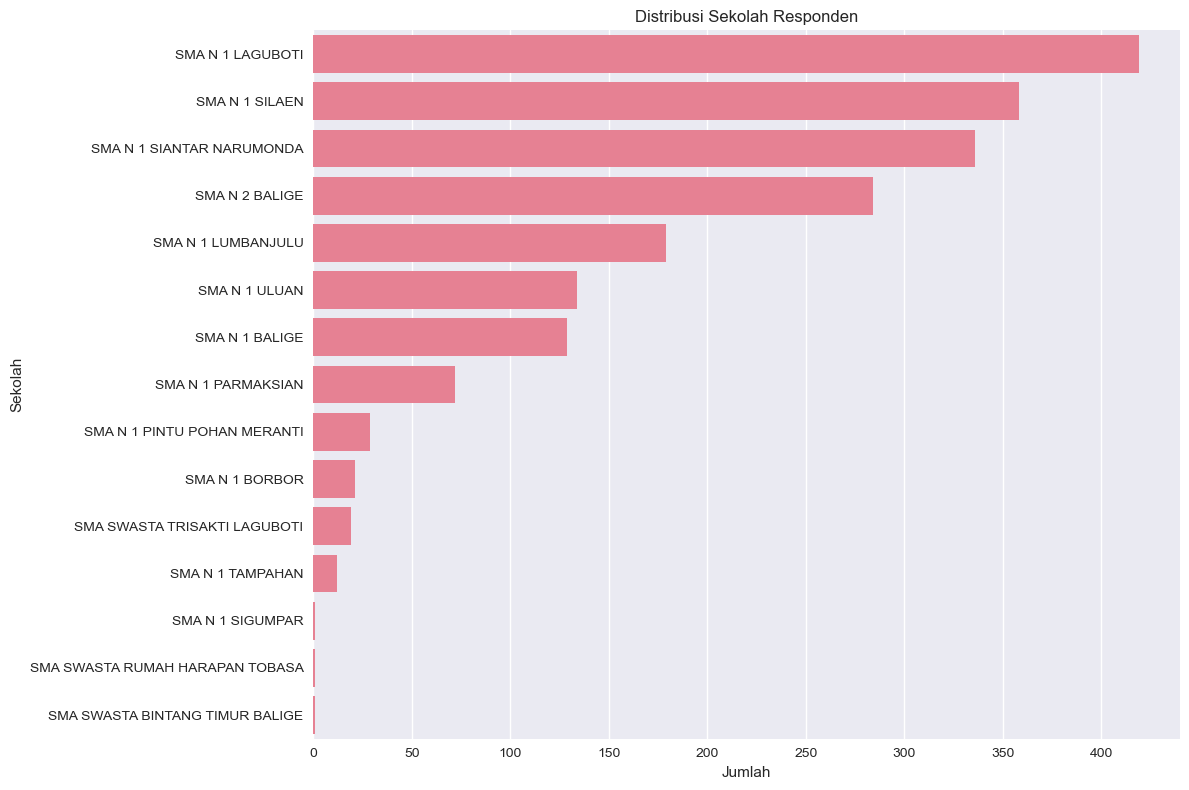

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(y='school', data=df, order=df['school'].value_counts().index)
plt.title('Distribusi Sekolah Responden')
plt.xlabel('Jumlah')
plt.ylabel('Sekolah')
plt.tight_layout()
plt.savefig('school_distribution.png')
plt.show()

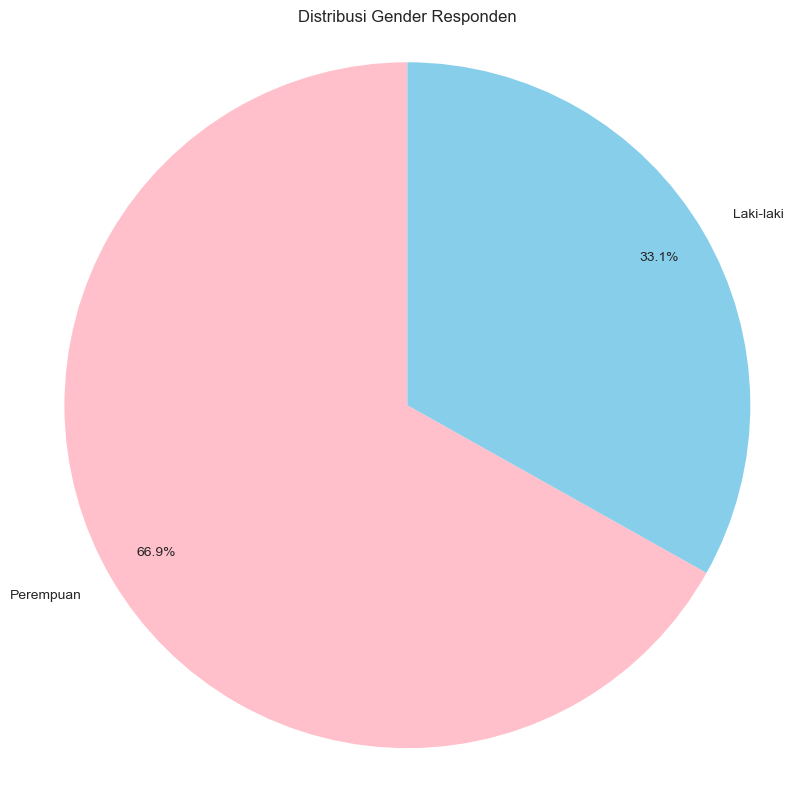

In [12]:
plt.figure(figsize=(8,8))
gender_counts = df['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
colors = ['pink', 'skyblue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=colors)
plt.title('Distribusi Gender Responden')
plt.axis('equal')
plt.tight_layout()
plt.savefig('gender_distribution_pie.png')
plt.show()

Distribusi Usia

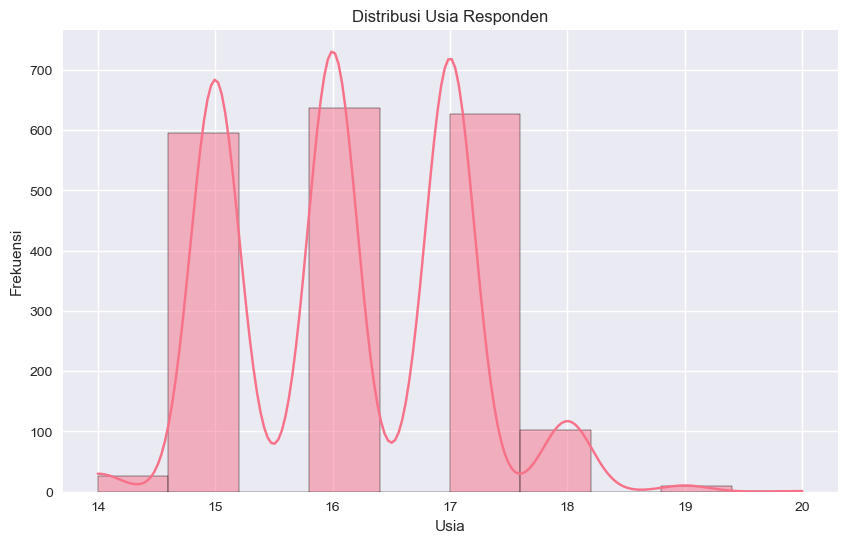

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribusi Usia Responden')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('age_distribution.png')
plt.show()

Distribusi Kelas

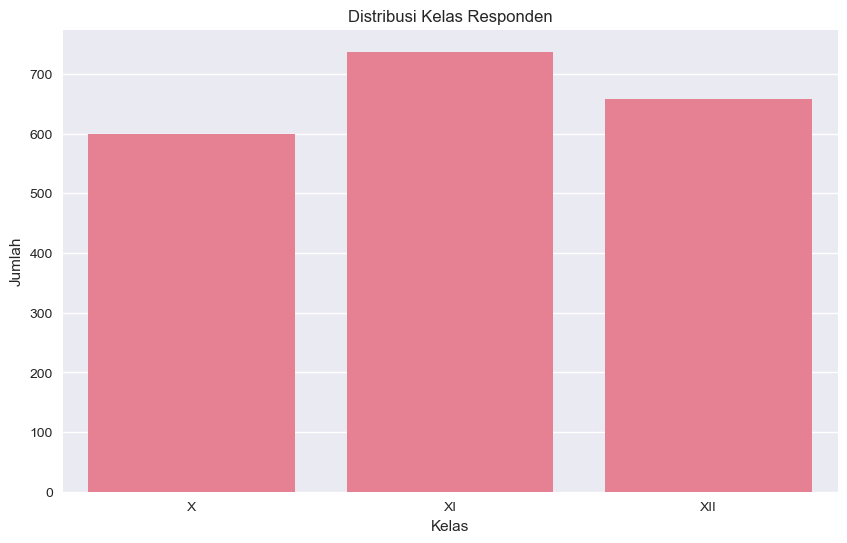

In [14]:
grade_order = ['X', 'XI', 'XII']

df['grade_level'] = pd.Categorical(df['grade_level'], categories=grade_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.countplot(x='grade_level', data=df)
plt.title('Distribusi Kelas Responden')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.savefig('class_distribution.png')
plt.show()

**Pengaruh Teman Sebaya dan media Sosial**





Pengaruh Teman dalam Pengambilan Keputusan

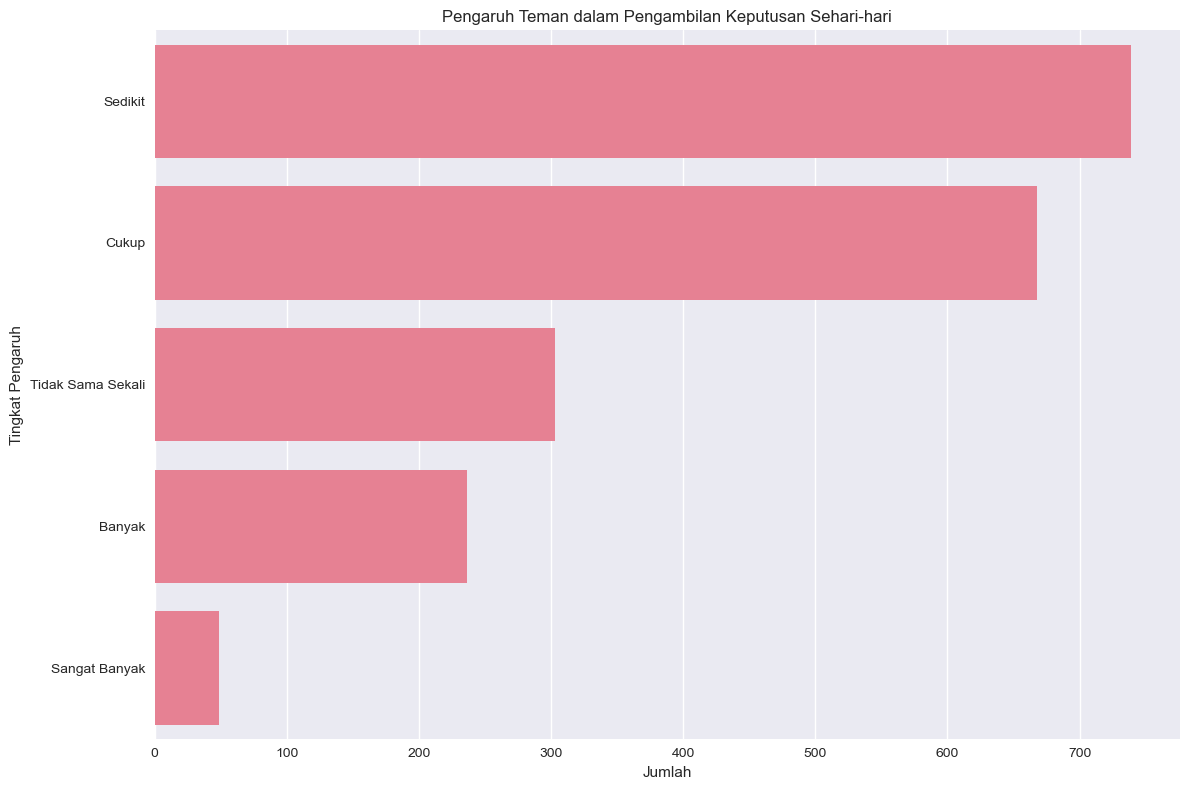

In [15]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Peer_influance_decision',
              data=df, order=df['Peer_influance_decision'].value_counts().index)
plt.title('Pengaruh Teman dalam Pengambilan Keputusan Sehari-hari')
plt.xlabel('Jumlah')
plt.ylabel('Tingkat Pengaruh')
plt.tight_layout()
plt.savefig('peer_influence.png')
plt.show()

Rasa takut di tolak jika mengikuti trend

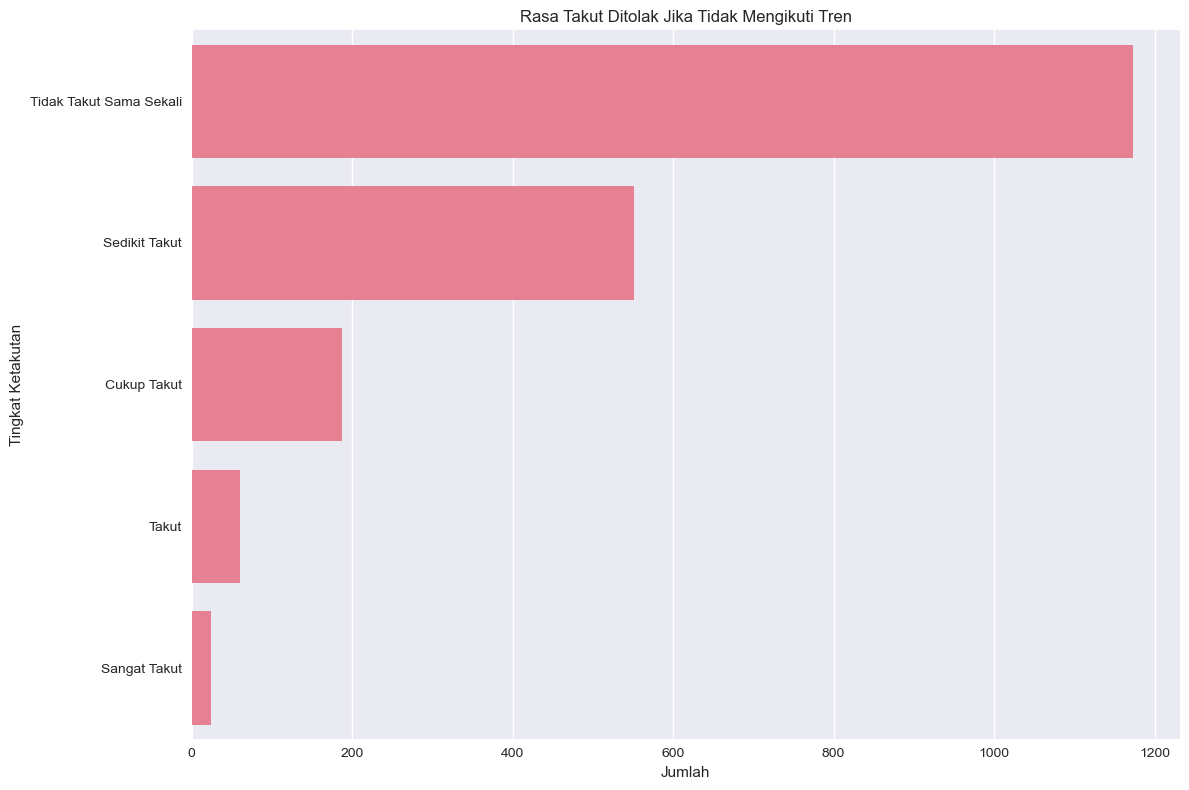

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(y='fear_of_rejection',
              data=df, order=df['fear_of_rejection'].value_counts().index)
plt.title('Rasa Takut Ditolak Jika Tidak Mengikuti Tren')
plt.xlabel('Jumlah')
plt.ylabel('Tingkat Ketakutan')
plt.tight_layout()
plt.savefig('fear_of_rejection.png')
plt.show()

Frekuensi Pembelian karena pengaruh Teman

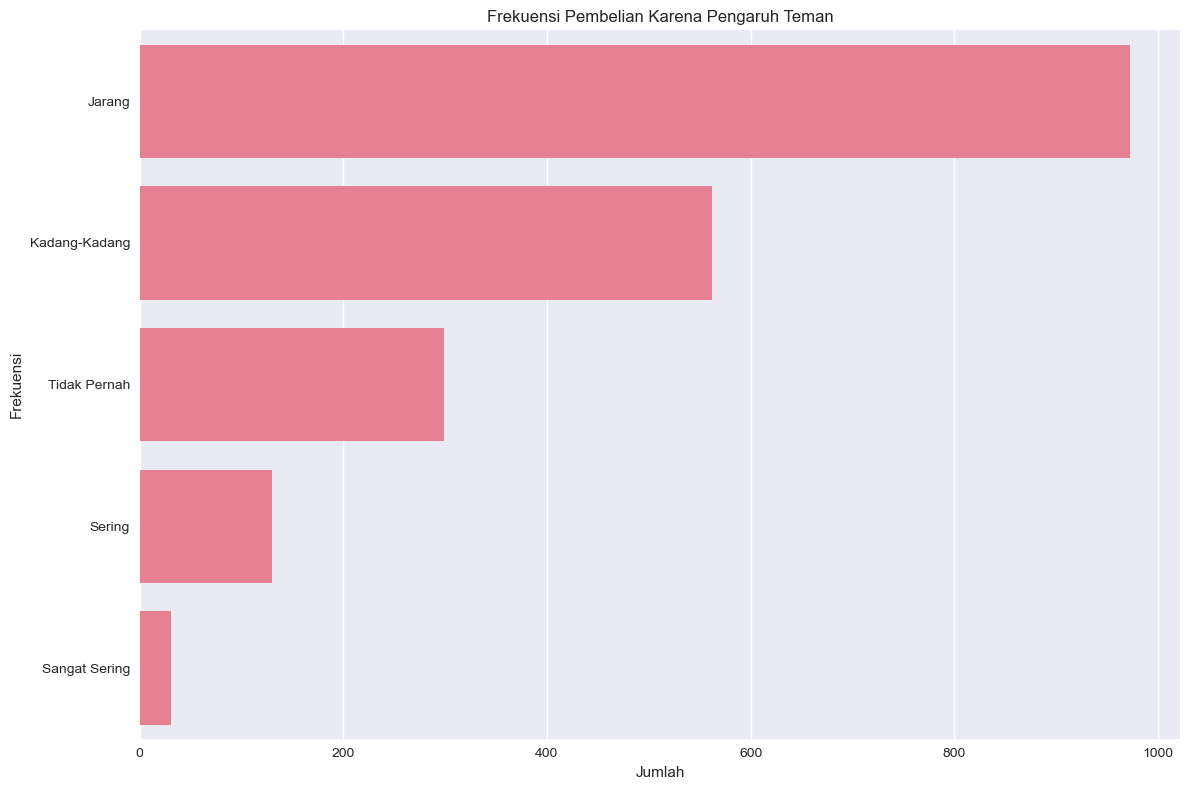

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(y='peer_influenced_buying',
              data=df, order=df['peer_influenced_buying'].value_counts().index)
plt.title('Frekuensi Pembelian Karena Pengaruh Teman')
plt.xlabel('Jumlah')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.savefig('friend_influenced_buying.png')
plt.show()

**Analisis Penggunaan Media Sosial**

Media Sosial Yang sering digunakan

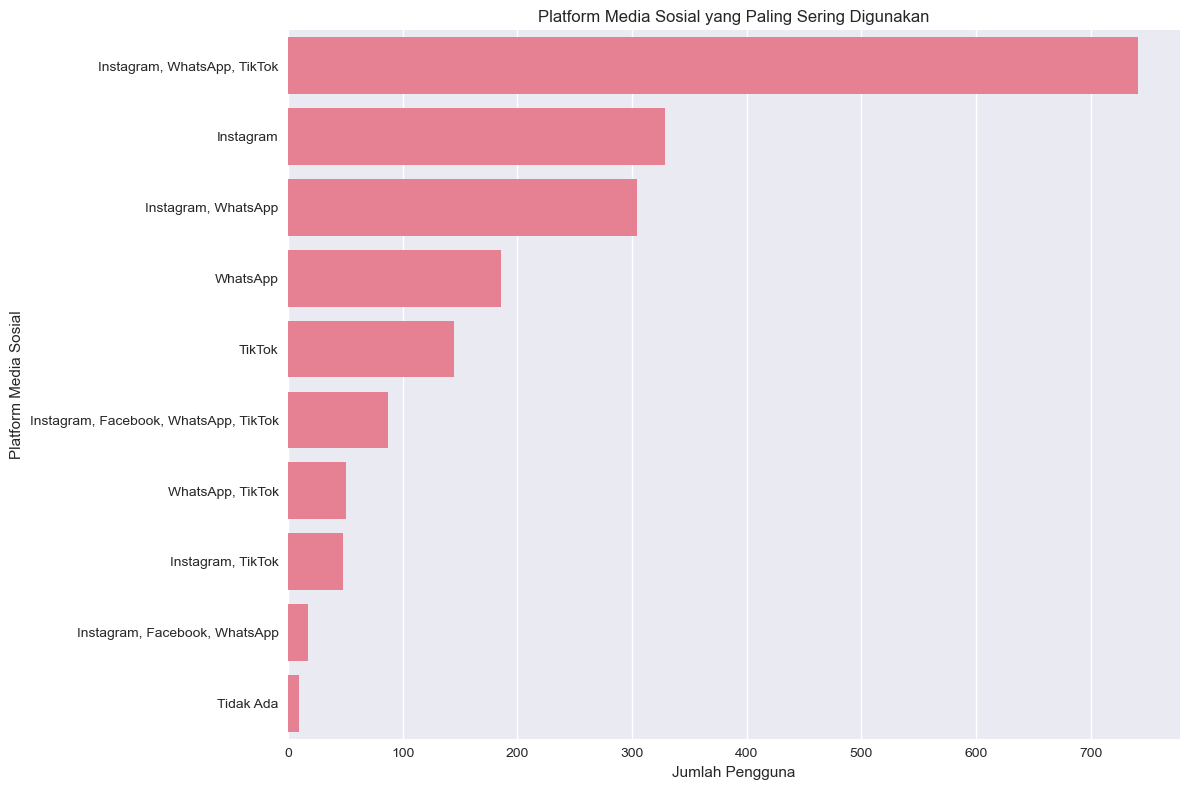

In [18]:
plt.figure(figsize=(12, 8))
social_media_counts = df['most_used_social_media'].value_counts().head(10)
sns.barplot(x=social_media_counts.values, y=social_media_counts.index)
plt.title('Platform Media Sosial yang Paling Sering Digunakan')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Platform Media Sosial')
plt.tight_layout()
plt.savefig('social_media_platforms.png')
plt.show()

Rata - rata penggunaan media sosial per hari

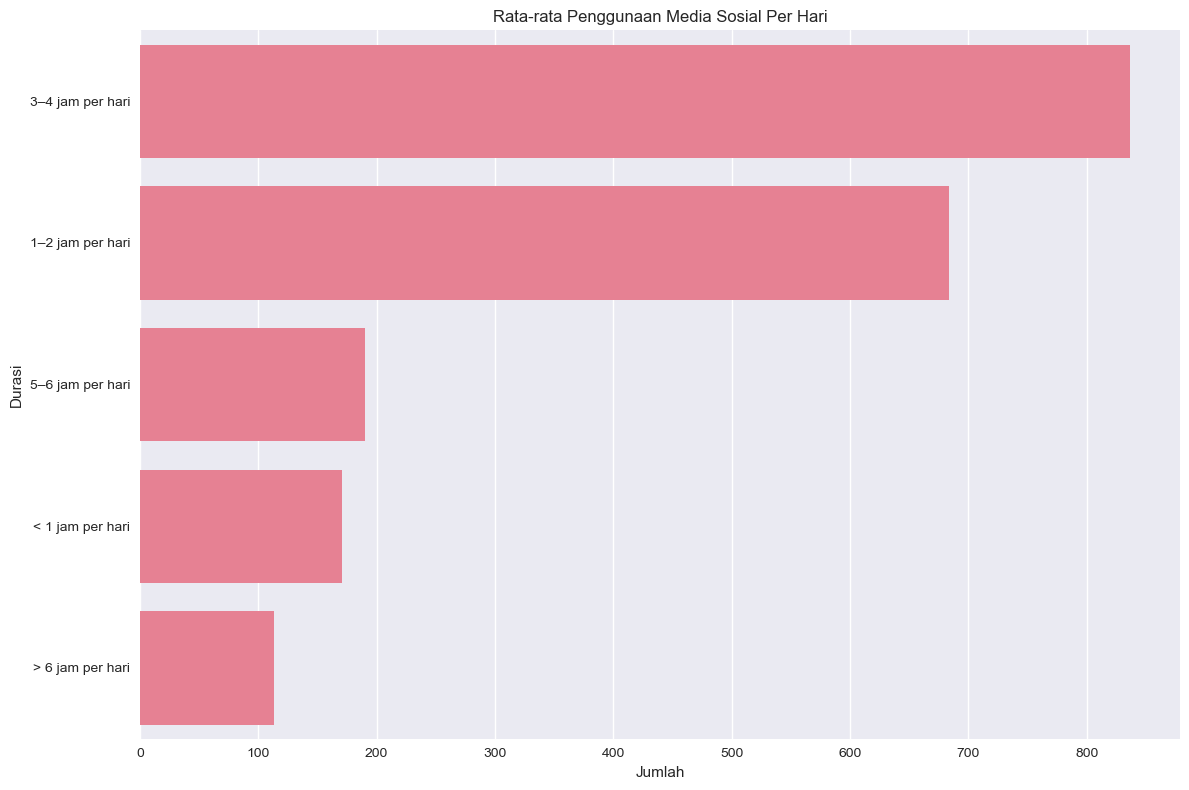

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(y='daily_social_media_hours',
              data=df, order=df['daily_social_media_hours'].value_counts().index)
plt.title('Rata-rata Penggunaan Media Sosial Per Hari')
plt.xlabel('Jumlah')
plt.ylabel('Durasi')
plt.tight_layout()
plt.savefig('social_media_usage_time.png')
plt.show()

Pengaruh Influencer Terhadap Gaya Hidup

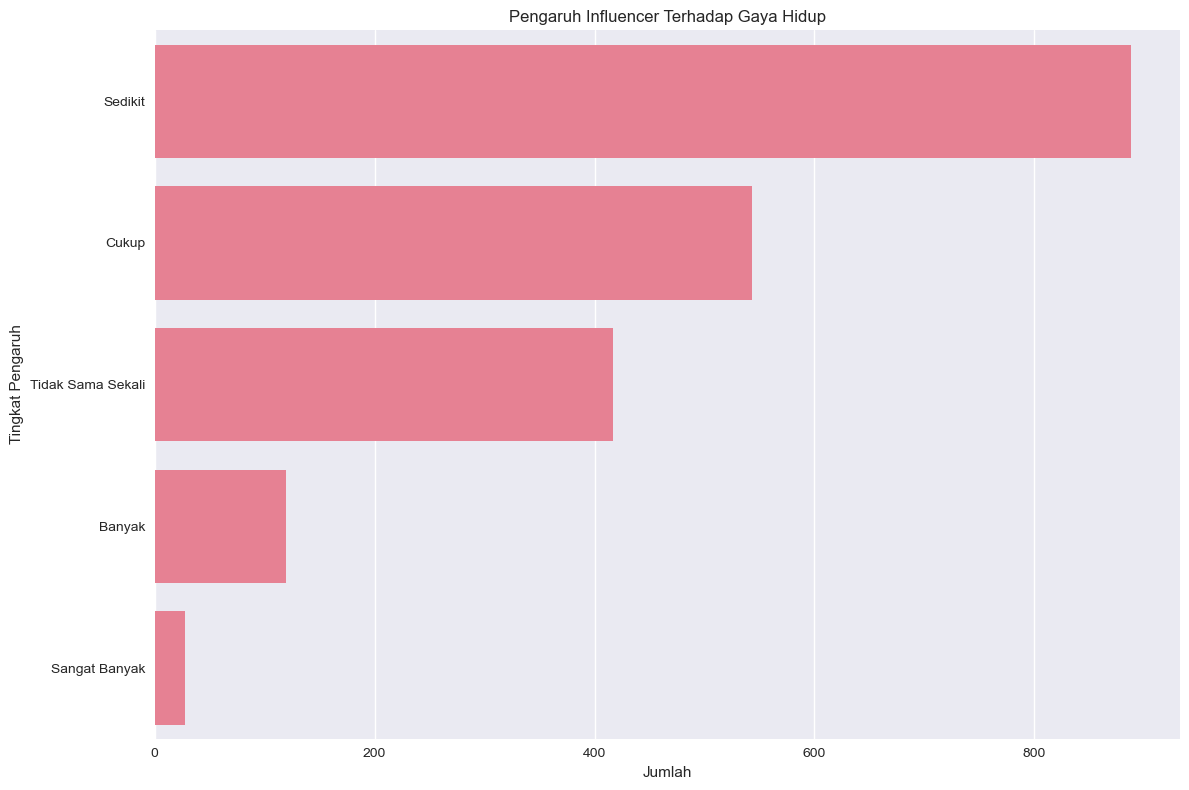

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(y='influencer_impact',
              data=df, order=df['influencer_impact'].value_counts().index)
plt.title('Pengaruh Influencer Terhadap Gaya Hidup')
plt.xlabel('Jumlah')
plt.ylabel('Tingkat Pengaruh')
plt.tight_layout()
plt.savefig('influencer_impact.png')
plt.show()

**Analisis Pola Pengeluaran**

Distribusi uang saku bulanan

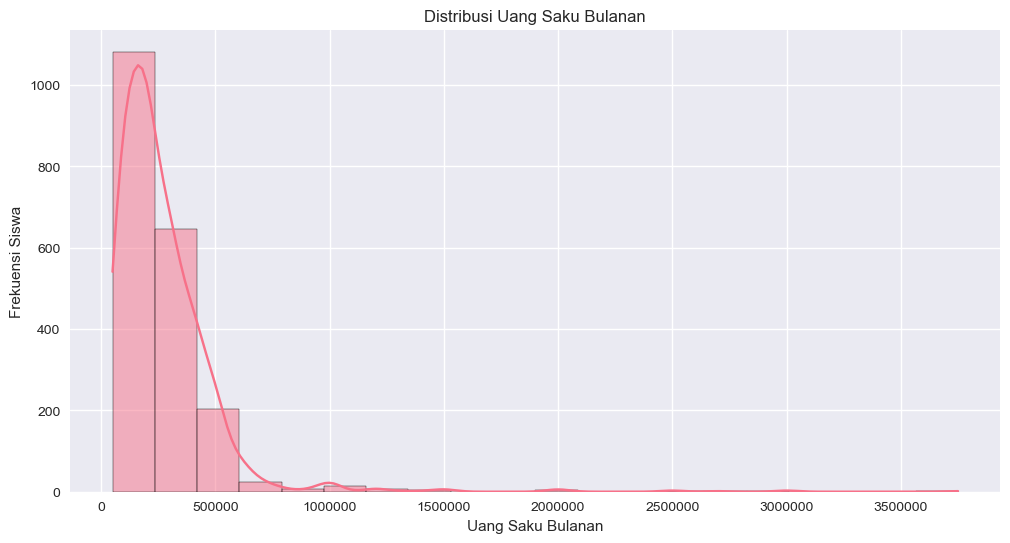

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(df['monthly_allowance'], bins=20, kde=True)
plt.title('Distribusi Uang Saku Bulanan')
plt.xlabel('Uang Saku Bulanan')
plt.ylabel('Frekuensi Siswa')
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.savefig('monthly_allowance_distribution.png')
plt.show()

Distribusi Total Pengeluaran Bulanan

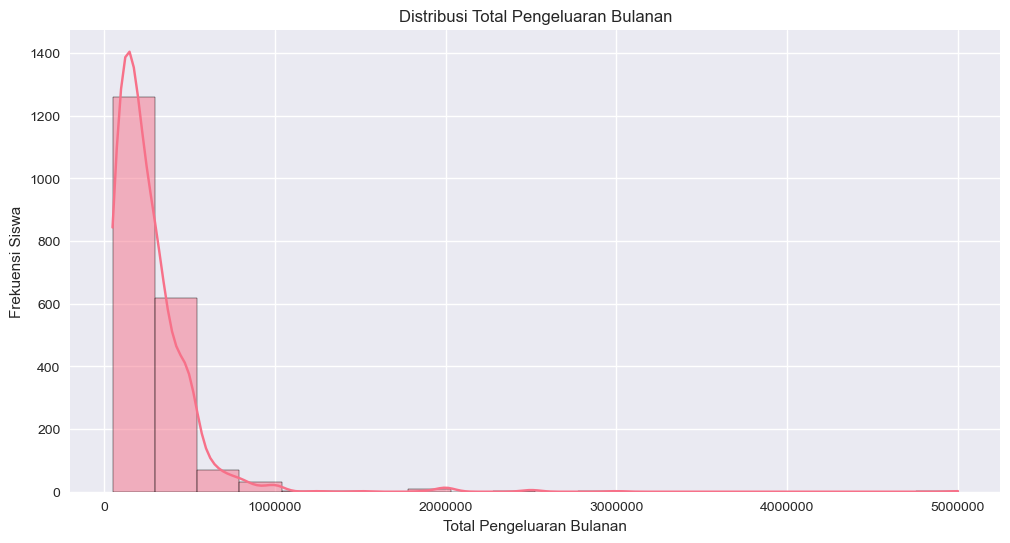

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(df['monthly_total_spending'], bins=20, kde=True)
plt.title('Distribusi Total Pengeluaran Bulanan')
plt.xlabel('Total Pengeluaran Bulanan')
plt.ylabel('Frekuensi Siswa')
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.savefig('monthly_spending_distribution.png')
plt.show()

Status Keuangan

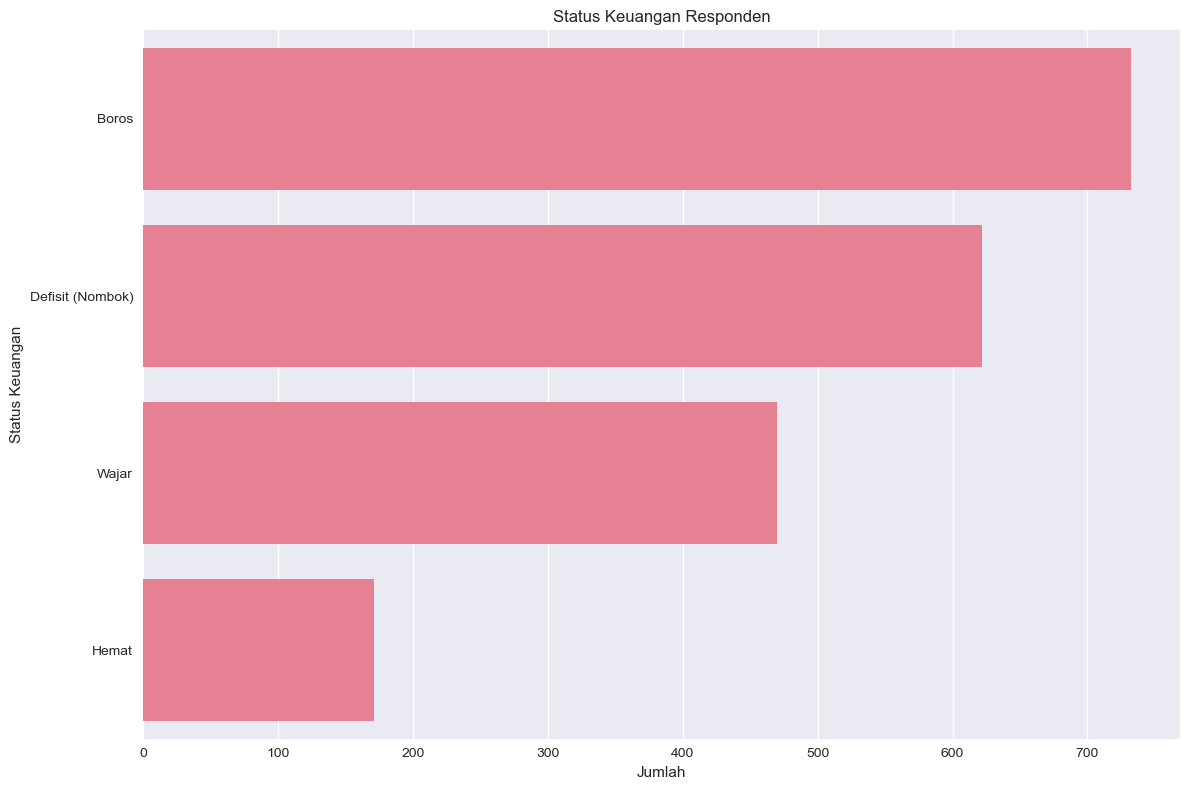

In [23]:
plt.figure(figsize=(12, 8))
sns.countplot(y='financial_status', data=df, order=df['financial_status'].value_counts().index)
plt.title('Status Keuangan Responden')
plt.xlabel('Jumlah')
plt.ylabel('Status Keuangan')
plt.tight_layout()
plt.savefig('financial_status.png')
plt.show()

Rasio Pengeluaran Terhadap Uang Saku

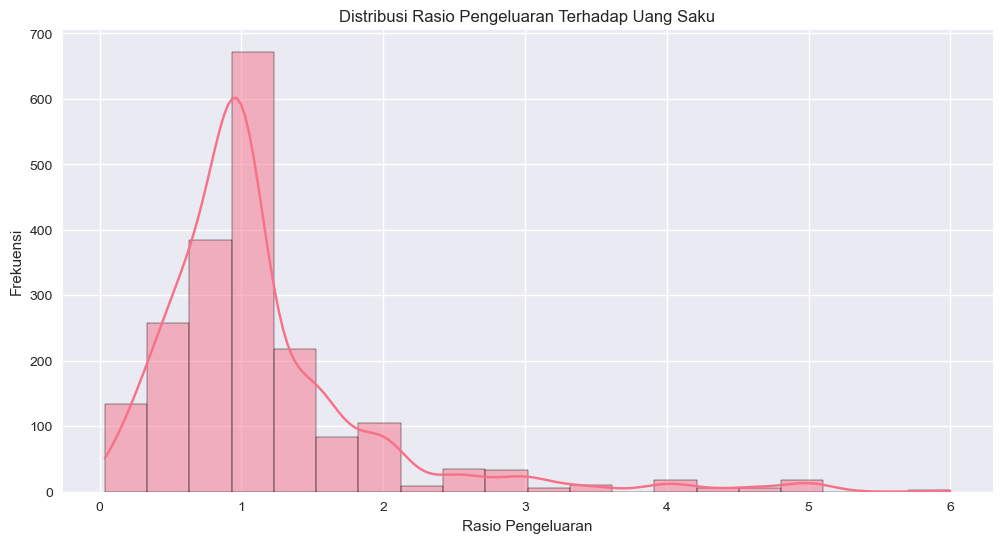

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['spending_ratio'], bins=20, kde=True)
plt.title('Distribusi Rasio Pengeluaran Terhadap Uang Saku')
plt.xlabel('Rasio Pengeluaran')
plt.ylabel('Frekuensi')
plt.savefig('spending_ratio_distribution.png')
plt.show()

**Analisis Hubungan Antara variabel-variabel**

Hubungan antara uang saku dan total pengeluaran

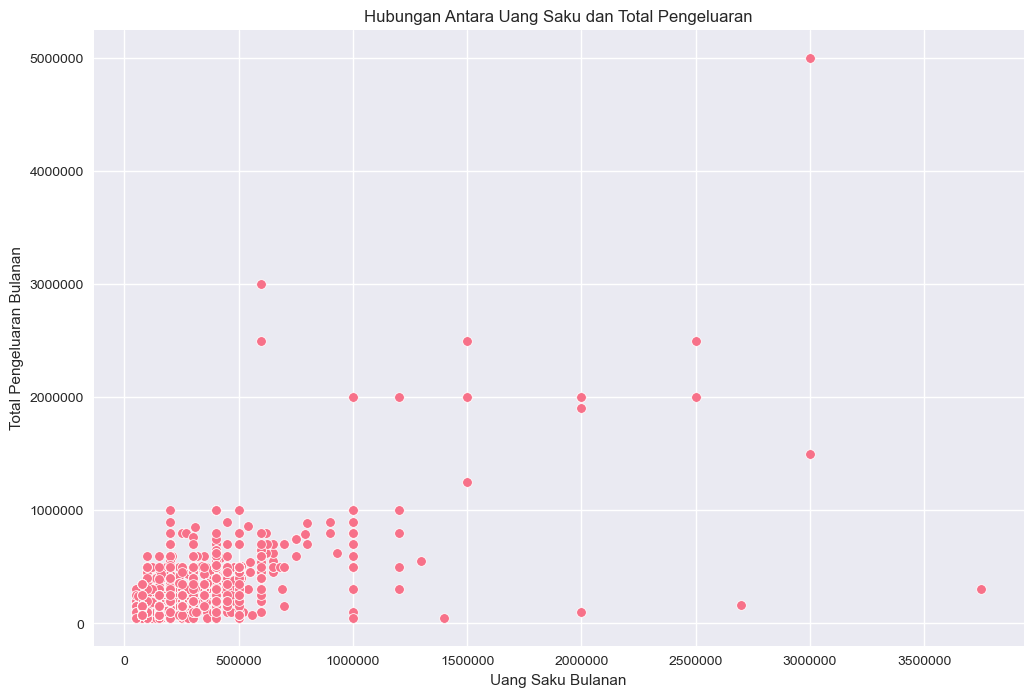

In [25]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='monthly_allowance', y='monthly_total_spending', data=df)
plt.title('Hubungan Antara Uang Saku dan Total Pengeluaran')
plt.xlabel('Uang Saku Bulanan')
plt.ylabel('Total Pengeluaran Bulanan')
plt.ticklabel_format(style='plain', axis='both')
plt.savefig('allowance_vs_spending.png')
plt.show()

Hubungan antara gender dan pengaruh teman

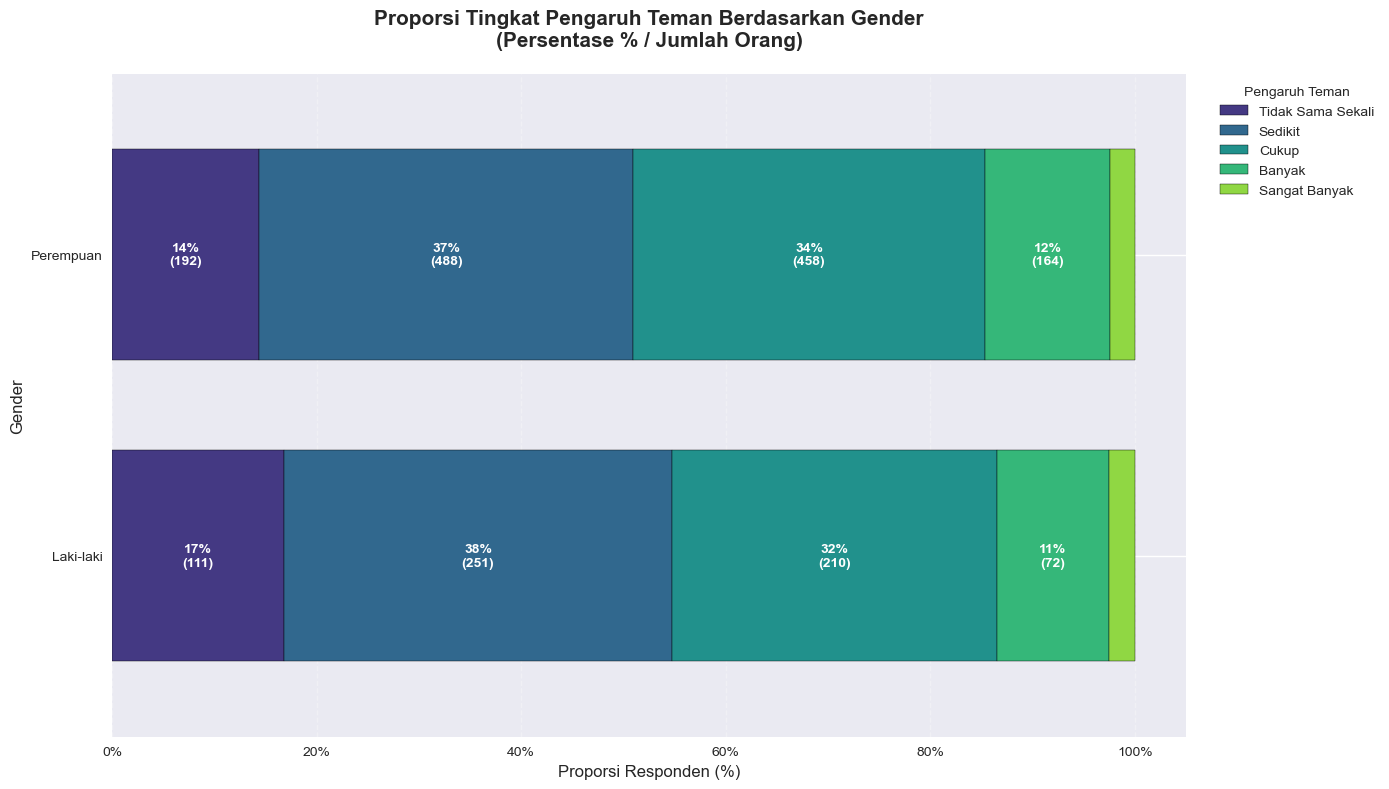

In [26]:
col_gender = 'gender'
col_peer = 'Peer_influance_decision'

# Atur Urutan Kategori (Ordinal) agar grafik bercerita dengan logis
order_peer = ['Tidak Sama Sekali', 'Sedikit', 'Cukup', 'Banyak', 'Sangat Banyak']

# Filter kategori
valid_peer = [x for x in order_peer if x in df[col_peer].unique()]

df_plot = df.copy()
df_plot[col_peer] = pd.Categorical(df_plot[col_peer], categories=valid_peer, ordered=True)

# Buat Tabel Kontingensi (Crosstab)
# Gender di baris (Sumbu Y), Peer Influence di kolom (Hue)
ct_counts = pd.crosstab(df_plot[col_gender], df_plot[col_peer])

# Tabel untuk persentase (untuk visualisasi bar 100%)
ct_pct = pd.crosstab(df_plot[col_gender], df_plot[col_peer], normalize='index') * 100

# Plotting
colors = sns.color_palette("viridis", n_colors=len(ct_pct.columns))
ax = ct_pct.plot( kind='barh', stacked=True,color=colors,figsize=(14, 8), width=0.7, edgecolor='black')

# Menambahkan Label Gabungan (Persen % / Jumlah)
for i, c in enumerate(ax.containers):
    # Ambil jumlah orang untuk kategori Peer Influence ke-i
    counts = ct_counts.iloc[:, i]

    labels = []
    for pct, count in zip(c.datavalues, counts):
        # Label hanya muncul jika proporsi > 3% agar tidak tumpang tindih
        if pct > 3:
            labels.append(f"{pct:.0f}%\n({count})")
        else:
            labels.append("")

    ax.bar_label(
        c,
        labels=labels,
        label_type='center',
        color='white',
        fontsize=10,
        fontweight='bold'
    )

# Judul & Label
plt.title('Proporsi Tingkat Pengaruh Teman Berdasarkan Gender\n(Persentase % / Jumlah Orang)',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Proporsi Responden (%)', fontsize=12)
plt.ylabel('Gender', fontsize=12)

# Mengatur Sumbu X menjadi Persen
plt.gca().xaxis.set_major_formatter(PercentFormatter())

plt.legend(title='Pengaruh Teman', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

# Simpan dan Tampilkan
plt.savefig('gender_vs_peer_hue.png', dpi=300)

plt.show()

Hubungan antara usia dan rasa takut ditolak

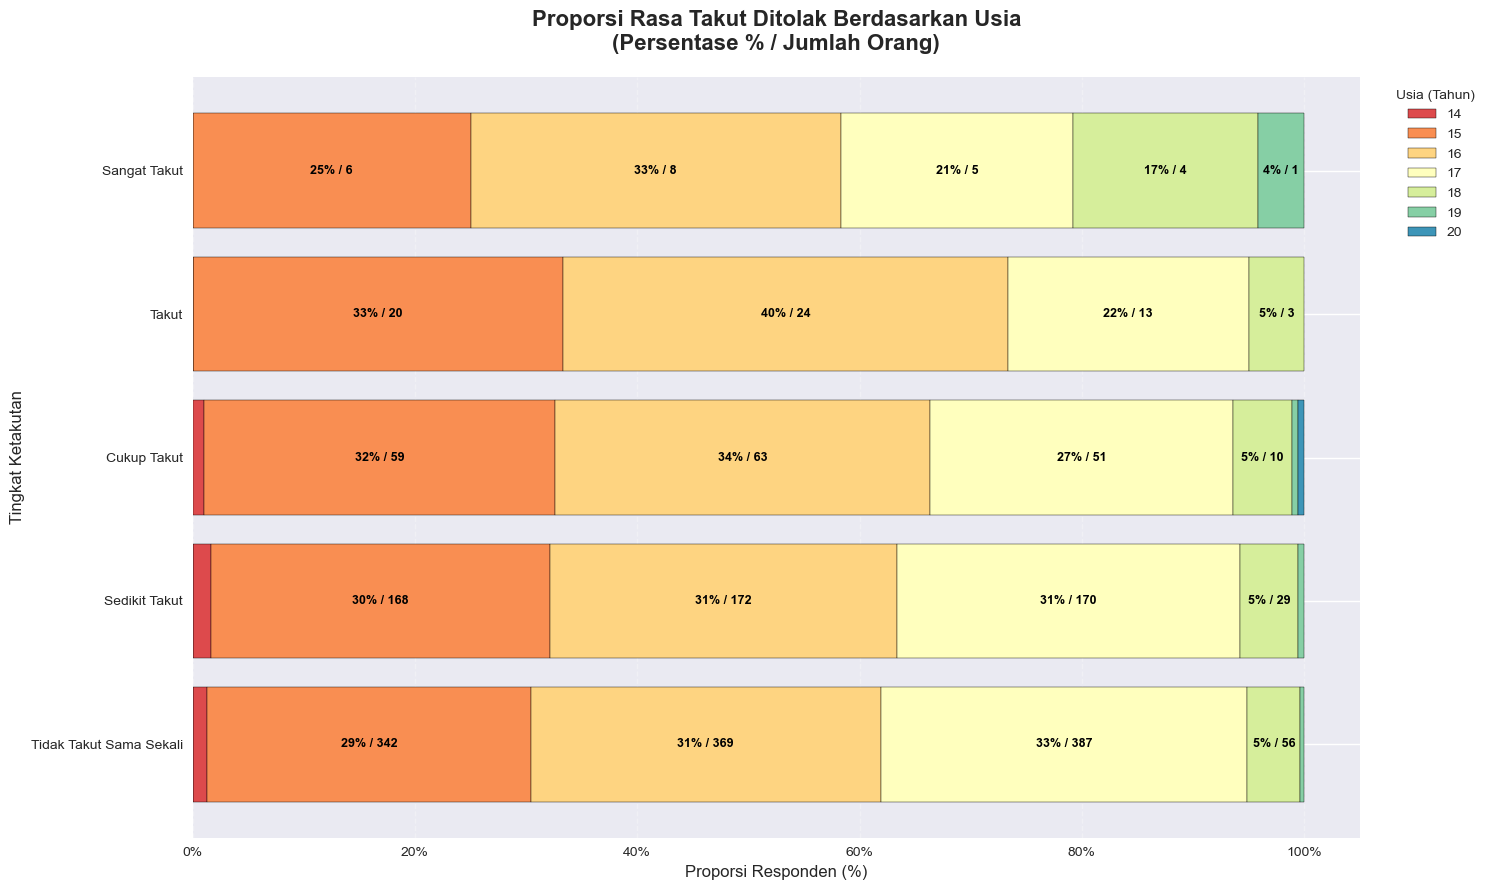

In [27]:
col_fear = 'fear_of_rejection'
col_usia = 'age'

if col_fear in df.columns and col_usia in df.columns:
    # Pembersihan & Filter Data Usia (SMA: 14-20)
    df[col_usia] = pd.to_numeric(df[col_usia], errors='coerce')
    df_clean = df[(df[col_usia] >= 14) & (df[col_usia] <= 20)].copy()
    df_clean[col_usia] = df_clean[col_usia].astype(int)

    # Atur Urutan Kategori (Ordinal) agar grafik bercerita dengan logis
    order_fear = ['Tidak Takut Sama Sekali','Sedikit Takut', 'Netral', 'Cukup Takut', 'Takut', 'Sangat Takut']

    # Filter kategori
    valid_fear = [x for x in order_fear if x in df_clean[col_fear].unique()]
    df_clean[col_fear] = pd.Categorical(df_clean[col_fear], categories=valid_fear, ordered=True)

    # Buat Tabel Kontingensi (Crosstab)
    ct_counts = pd.crosstab(df_clean[col_fear], df_clean[col_usia])

    # Tabel untuk persentase (untuk visualisasi bar 100%)
    ct_pct = pd.crosstab(df_clean[col_fear], df_clean[col_usia], normalize='index') * 100

    # Plotting
    colors = sns.color_palette("Spectral", n_colors=len(ct_pct.columns))
    ax = ct_pct.plot(kind='barh', stacked=True, color=colors, figsize=(15, 9), width=0.8, edgecolor='black')

    # Menambahkan Label Gabungan (Persen % / Jumlah)
    for i, c in enumerate(ax.containers):
        # Ambil kolom jumlah yang sesuai dengan kelompok usia saat ini
        counts = ct_counts.iloc[:, i]

        labels = []
        for pct, count in zip(c.datavalues, counts):
            # Label hanya muncul jika proporsi > 3% agar tidak tumpang tindih
            if pct > 3:
                labels.append(f"{pct:.0f}% / {count}")
            else:
                labels.append("")

        ax.bar_label(
            c,
            labels=labels,
            label_type='center',
            color='black', # Hitam lebih kontras dengan palet Spectral yang terang
            fontsize=9,
            fontweight='bold'
        )

    # Judul & Label
    plt.title('Proporsi Rasa Takut Ditolak Berdasarkan Usia\n(Persentase % / Jumlah Orang)',
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Proporsi Responden (%)', fontsize=12)
    plt.ylabel('Tingkat Ketakutan', fontsize=12)

    # Mengatur Sumbu X menjadi Persen
    plt.gca().xaxis.set_major_formatter(PercentFormatter())

    plt.legend(title='Usia (Tahun)', bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()

    # Simpan dan Tampilkan
    plt.show()

else:
    print(f"Kolom '{col_fear}' atau '{col_usia}' tidak ditemukan dalam DataFrame.")

Hubungan antara penggunaan media sosial dan pengaruh influencer

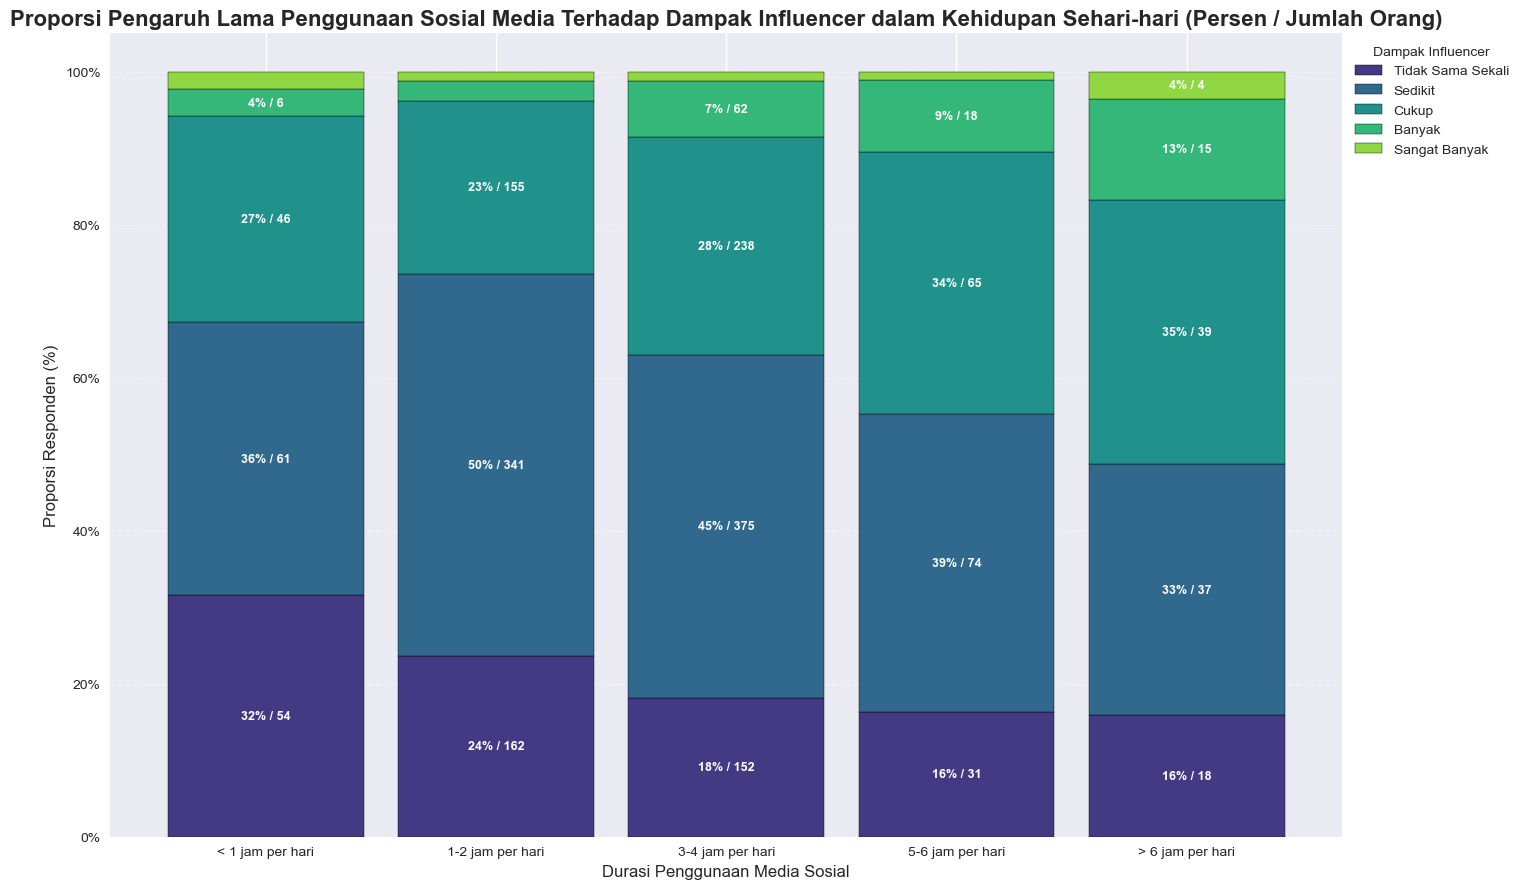

In [28]:
col_durasi = 'daily_social_media_hours'
col_influencer = 'influencer_impact'

if col_durasi in df.columns and col_influencer in df.columns:
    df[col_durasi] = df[col_durasi].astype(str).str.replace('–', '-', regex=False)

# Atur Urutan Kategori (Ordinal) agar grafik bercerita dengan logis
    order_durasi = ['< 1 jam per hari', '1-2 jam per hari', '3-4 jam per hari', '5-6 jam per hari', '> 6 jam per hari']
    order_influencer = ['Tidak Sama Sekali', 'Sedikit', 'Cukup', 'Banyak', 'Sangat Banyak']

# Filter kategori
    valid_durasi = [x for x in order_durasi if x in df[col_durasi].unique()]
    valid_inf = [x for x in order_influencer if x in df[col_influencer].unique()]

    df_plot = df.copy()
    df_plot[col_durasi] = pd.Categorical(df_plot[col_durasi], categories=valid_durasi, ordered=True)
    df_plot[col_influencer] = pd.Categorical(df_plot[col_influencer], categories=valid_inf, ordered=True)

# Buat Tabel Kontingensi (Crosstab)
# Tabel untuk jumlah riil (untuk label)
    ct_counts = pd.crosstab(df_plot[col_durasi], df_plot[col_influencer])

# Tabel untuk persentase (untuk visualisasi bar 100%)
    ct_pct = pd.crosstab(df_plot[col_durasi], df_plot[col_influencer], normalize='index') * 100

# Plotting
    colors = sns.color_palette("viridis", n_colors=len(ct_pct.columns))

    ax = ct_pct.plot(kind='bar', stacked=True, color=colors, figsize=(15, 9), width=0.85, edgecolor='black')

# Menambahkan Label Gabungan (Persen % / Jumlah)
    for i, c in enumerate(ax.containers):
        # Ambil kolom jumlah yang sesuai dengan warna saat ini
        counts = ct_counts.iloc[:, i]

        labels = []
        for pct, count in zip(c.datavalues, counts):
            # Label hanya muncul jika proporsi > 3% agar tidak tumpang tindih
            if pct > 3:
                label_text = f"{pct:.0f}% / {count}"
            else:
                label_text = ""
            labels.append(label_text)

        ax.bar_label(
            c,
            labels=labels,
            label_type='center',
            color='white',
            fontsize=9,
            fontweight='bold'
        )

# Judul & Label
    plt.title('Proporsi Pengaruh Lama Penggunaan Sosial Media Terhadap Dampak Influencer dalam Kehidupan Sehari-hari (Persen / Jumlah Orang)', fontsize=16, fontweight='bold')
    plt.xlabel('Durasi Penggunaan Media Sosial', fontsize=12)
    plt.ylabel('Proporsi Responden (%)', fontsize=12)
    plt.xticks(rotation=0)

    # Mengatur Sumbu X menjadi Persen
    plt.gca().yaxis.set_major_formatter(PercentFormatter())
    plt.legend(title='Dampak Influencer', bbox_to_anchor=(1, 1))
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()

# Simpan dan Tampilkan
    plt.savefig('medsos_influencer_combined_label.png')
    plt.show()

else:
    print("Kolom tidak ditemukan.")

analisis korelasi antar variabel numerik

In [29]:
numeric_cols = ['age', 'monthly_allowance', 'monthly_total_spending', 'spending_ratio']

In [30]:
df = df.rename(columns=rename_mapping)
corr_matrix = df[numeric_cols].corr()

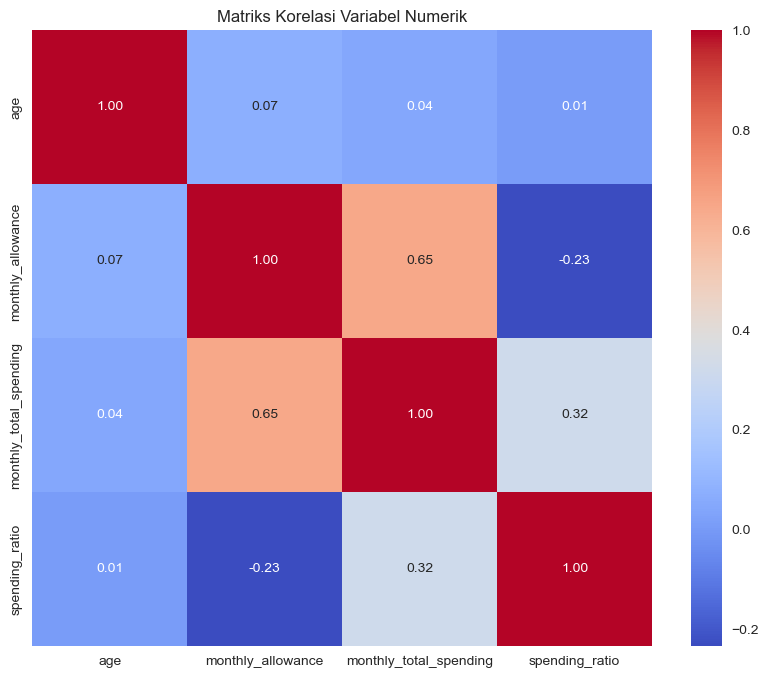

In [31]:
df = df.rename(columns=rename_mapping)
numeric_cols = ['age', 'monthly_allowance', 'monthly_total_spending', 'spending_ratio']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.savefig('correlation_matrix.png')
plt.show()

In [32]:
from scipy.stats import chi2_contingency

In [33]:
categorical_cols = [
    'gender', 'grade_level',
    'Peer_influance_decision',
    'fear_of_rejection',
    'peer_influenced_buying',
    'financial_status'
]

In [34]:
chi2_results = []
for i, col1 in enumerate(categorical_cols):
    for j, col2 in enumerate(categorical_cols):
        if i < j:  # Menghindari duplikasi
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi2_results.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Chi2': chi2,
                'P-value': p,
                'Significant': p < 0.05
            })

In [35]:
chi2_df = pd.DataFrame(chi2_results)
print("\nHasil Uji Chi-Square Antara Variabel Kategorikal:")
print(chi2_df.sort_values('P-value'))


Hasil Uji Chi-Square Antara Variabel Kategorikal:
                 Variable 1               Variable 2        Chi2  \
10  Peer_influance_decision   peer_influenced_buying  432.371165   
9   Peer_influance_decision        fear_of_rejection  197.008510   
12        fear_of_rejection   peer_influenced_buying  106.810907   
3                    gender   peer_influenced_buying   18.108325   
14   peer_influenced_buying         financial_status   18.091003   
0                    gender              grade_level    4.347191   
5               grade_level  Peer_influance_decision   12.420362   
4                    gender         financial_status    5.039654   
7               grade_level   peer_influenced_buying   11.452695   
2                    gender        fear_of_rejection    5.310160   
6               grade_level        fear_of_rejection    9.965298   
13        fear_of_rejection         financial_status   12.498451   
1                    gender  Peer_influance_decision    3.561558 

**analisis hubungan antara tekanan sosial dan perilaku konsumtif**

Hubungan antara tekanan teman dan pembelian impulsif

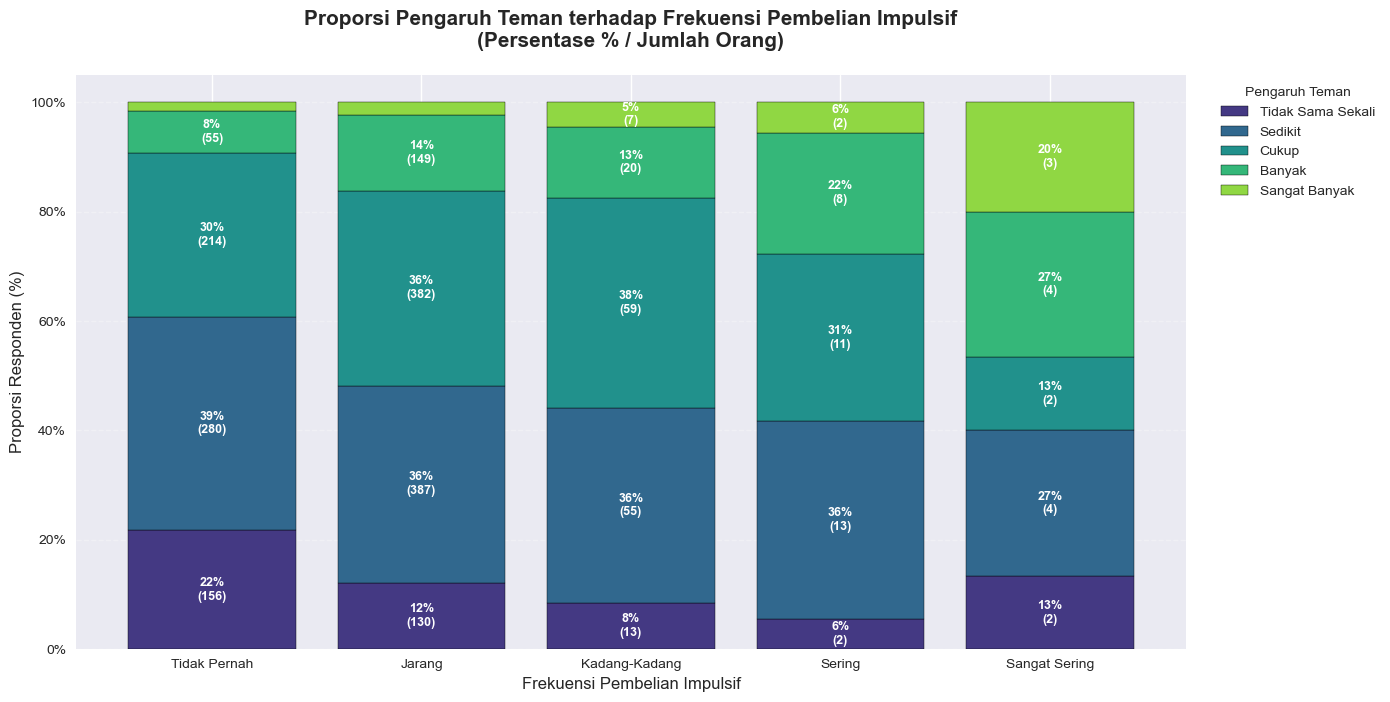

In [36]:
col_impulsive = 'freq_impulsive_buying'
col_peer = 'Peer_influance_decision'

# Atur Urutan Kategori (Ordinal) agar grafik bercerita dengan logis
order_impulsive = ['Tidak Pernah', 'Jarang', 'Kadang-Kadang', 'Sering', 'Sangat Sering']
order_peer = ['Tidak Sama Sekali', 'Sedikit', 'Cukup', 'Banyak', 'Sangat Banyak']

# Filter kategori
valid_imp = [x for x in order_impulsive if x in df[col_impulsive].unique()]
valid_peer = [x for x in order_peer if x in df[col_peer].unique()]

df_plot = df.copy()
df_plot[col_impulsive] = pd.Categorical(df_plot[col_impulsive], categories=valid_imp, ordered=True)
df_plot[col_peer] = pd.Categorical(df_plot[col_peer], categories=valid_peer, ordered=True)

# Buat Tabel Kontingensi (Crosstab)
ct_counts = pd.crosstab(df_plot[col_impulsive], df_plot[col_peer])

# Tabel untuk persentase (untuk visualisasi bar 100%)
ct_pct = pd.crosstab(df_plot[col_impulsive], df_plot[col_peer], normalize='index') * 100

# Plotting
colors = sns.color_palette("viridis", n_colors=len(ct_pct.columns))
ax = ct_pct.plot(kind='bar', stacked=True, color=colors, figsize=(14, 8), width=0.8, edgecolor='black')

# Menambahkan Label Gabungan (Persen % / Jumlah)
for i, c in enumerate(ax.containers):
    # Ambil kolom jumlah yang sesuai dengan kategori 'Peer Influence' saat ini
    counts = ct_counts.iloc[:, i]

    labels = []
    for pct, count in zip(c.datavalues, counts):
        # Hanya tampilkan label jika persentase > 3% agar tidak tumpang tindih
        if pct > 3:
            labels.append(f"{pct:.0f}%\n({count})")
        else:
            labels.append("")

    # Tempel label di tengah setiap segmen bar
    ax.bar_label(
        c,
        labels=labels,
        label_type='center',
        color='white',
        fontsize=9,
        fontweight='bold'
    )

# Judul & Label
plt.title('Proporsi Pengaruh Teman terhadap Frekuensi Pembelian Impulsif\n(Persentase % / Jumlah Orang)',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Frekuensi Pembelian Impulsif', fontsize=12)
plt.ylabel('Proporsi Responden (%)', fontsize=12)

# Mengatur Sumbu Y menjadi Persen
plt.gca().yaxis.set_major_formatter(PercentFormatter())

plt.legend(title='Pengaruh Teman', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.xticks(rotation=0)

# Simpan dan Tampilkan
plt.savefig('impulsive_vs_peer_combined.png', dpi=300)
plt.show()

Hubungan antara rasa takut ditolak dan pembelian untuk diterima

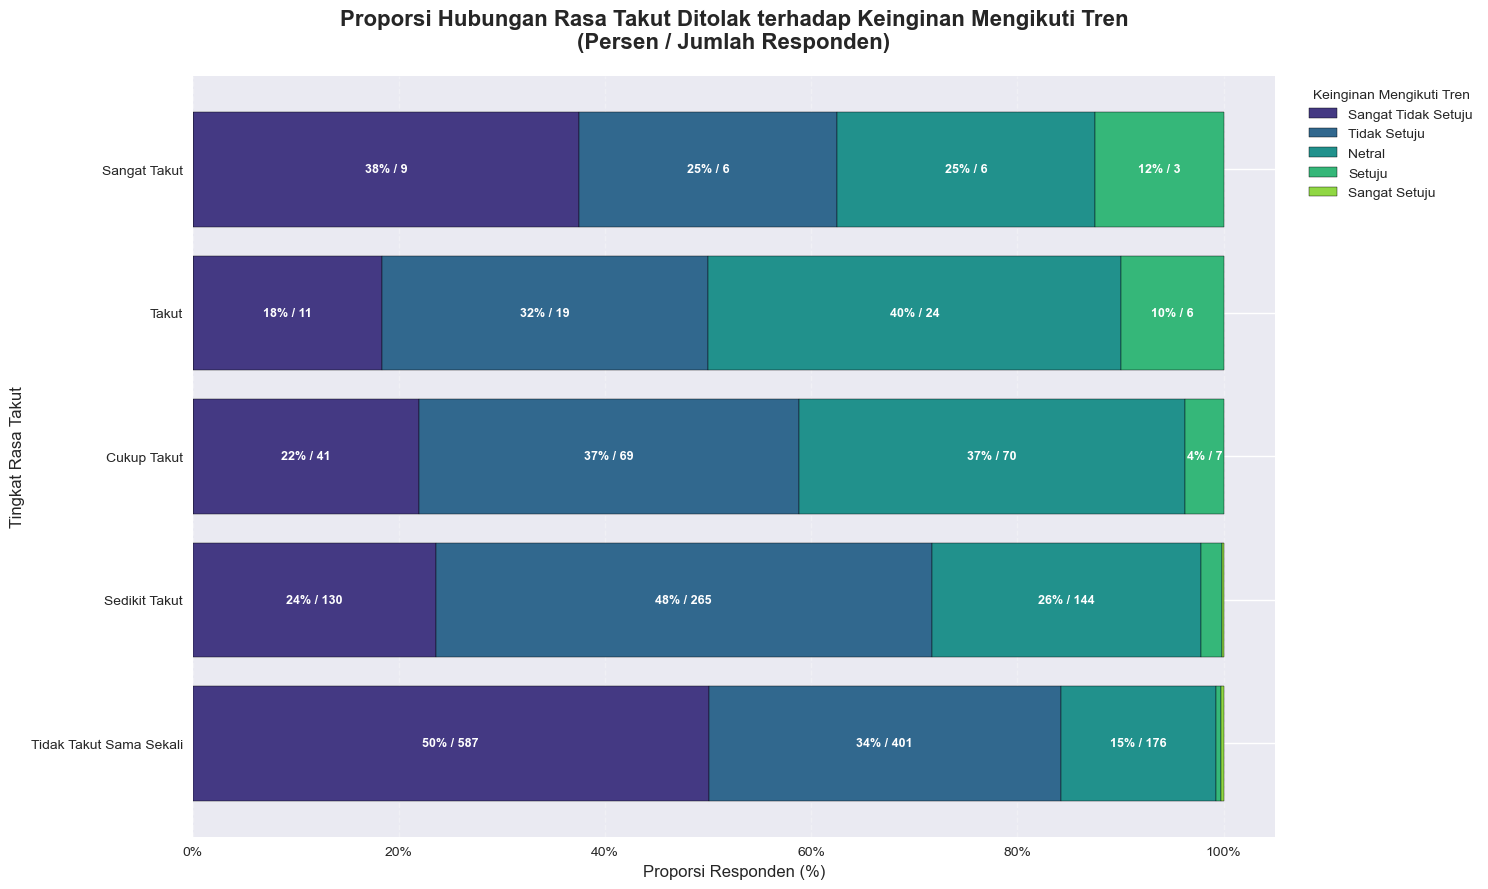

In [37]:
col_y = 'fear_of_rejection'
col_hue = 'attitude_need_trend_acceptance'

# Atur Urutan Kategori (Ordinal) agar grafik bercerita dengan logis
order_hue = ['Sangat Tidak Setuju', 'Tidak Setuju', 'Netral', 'Setuju', 'Sangat Setuju']
order_y = ['Tidak Takut Sama Sekali', 'Sedikit Takut', 'Cukup Takut', 'Takut', 'Sangat Takut']

# Filter kategori
valid_y = [x for x in order_y if x in df[col_y].unique()]
valid_hue = [x for x in order_hue if x in df[col_hue].unique()]

df_plot = df.copy()
df_plot[col_y] = pd.Categorical(df_plot[col_y], categories=valid_y, ordered=True)
df_plot[col_hue] = pd.Categorical(df_plot[col_hue], categories=valid_hue, ordered=True)

# Buat Tabel Kontingensi (Crosstab)
# Tabel untuk jumlah riil (untuk label)
ct_counts = pd.crosstab(df_plot[col_y], df_plot[col_hue])

# Tabel untuk persentase (untuk visualisasi bar 100%)
ct_pct = pd.crosstab(df_plot[col_y], df_plot[col_hue], normalize='index') * 100

# Plotting
colors = sns.color_palette("viridis", n_colors=len(ct_pct.columns))
ax = ct_pct.plot(kind='barh', stacked=True, color=colors, figsize=(15, 9), width=0.8, edgecolor='black')

# Menambahkan Label Gabungan (Persen % / Jumlah)
for i, c in enumerate(ax.containers):
    # Ambil kolom jumlah yang sesuai dengan kelompok (hue) saat ini
    counts = ct_counts.iloc[:, i]

    labels = []
    for pct, count in zip(c.datavalues, counts):
        # Label hanya muncul jika proporsi > 3% agar tidak tumpang tindih
        if pct > 3:
            labels.append(f"{pct:.0f}% / {count}")
        else:
            labels.append("")

    ax.bar_label(
        c,
        labels=labels,
        label_type='center',
        color='white',
        fontsize=9,
        fontweight='bold'
    )

# Judul & Label
plt.title('Proporsi Hubungan Rasa Takut Ditolak terhadap Keinginan Mengikuti Tren\n(Persen / Jumlah Responden)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Proporsi Responden (%)', fontsize=12)
plt.ylabel('Tingkat Rasa Takut', fontsize=12)

# Mengatur Sumbu X menjadi Persen
plt.gca().xaxis.set_major_formatter(PercentFormatter())

plt.legend(title='Keinginan Mengikuti Tren', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

# Simpan dan Tampilkan
plt.savefig('fear_vs_trend_stacked_100.png')
plt.show()

Hubungan antara pengaruh influencer dan pembelian online

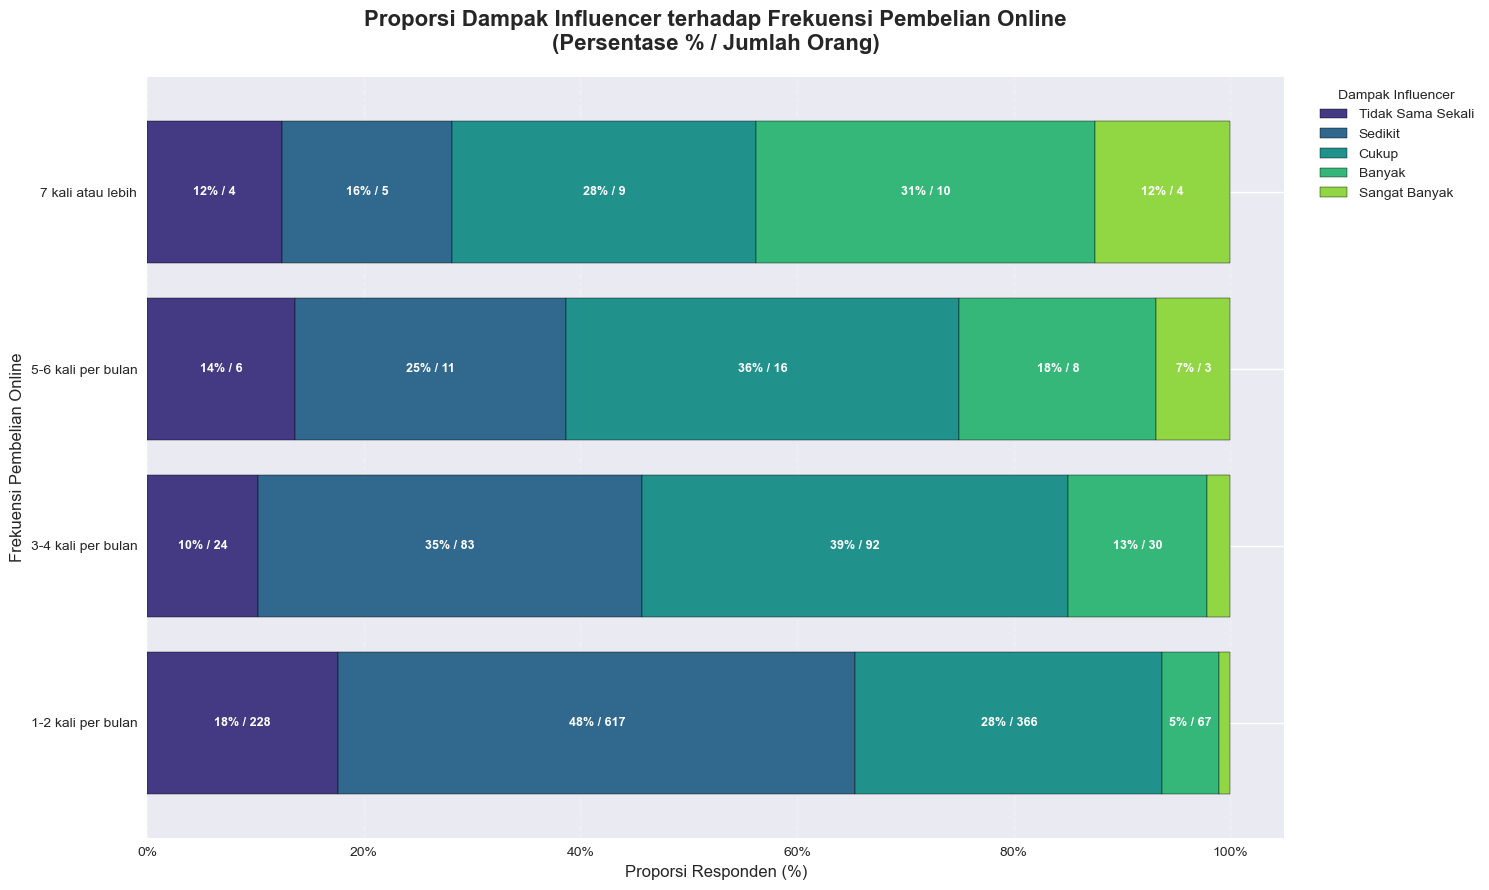

In [38]:
col_y = 'online_shopping_frequency'
col_hue = 'influencer_impact'

# Atur Urutan Kategori (Ordinal) agar grafik bercerita dengan logis
order_y = ['0 kali / Tidak pernah', '1-2 kali per bulan', '3-4 kali per bulan', '5-6 kali per bulan', '7 kali atau lebih']
order_hue = ['Tidak Sama Sekali', 'Sedikit', 'Cukup', 'Banyak', 'Sangat Banyak']

# Filter kategori
valid_y = [x for x in order_y if x in df[col_y].unique()]
valid_hue = [x for x in order_hue if x in df[col_hue].unique()]

df_plot = df.copy()
df_plot[col_y] = pd.Categorical(df_plot[col_y], categories=valid_y, ordered=True)
df_plot[col_hue] = pd.Categorical(df_plot[col_hue], categories=valid_hue, ordered=True)

# Buat Tabel Kontingensi (Crosstab)
# Tabel untuk jumlah riil (untuk label)
ct_counts = pd.crosstab(df_plot[col_y], df_plot[col_hue])

# Tabel untuk persentase (untuk visualisasi bar 100%)
ct_pct = pd.crosstab(df_plot[col_y], df_plot[col_hue], normalize='index') * 100

# Plotting
colors = sns.color_palette("viridis", n_colors=len(ct_pct.columns))
ax = ct_pct.plot(kind='barh', stacked=True, color=colors, figsize=(15, 9), width=0.8, edgecolor='black')

# Menambahkan Label Gabungan (Persen % / Jumlah)
for i, c in enumerate(ax.containers):
    # Ambil nilai count yang sesuai untuk kolom hue ke-i
    counts = ct_counts.iloc[:, i]

    labels = []
    for pct, count in zip(c.datavalues, counts):
        # Label hanya muncul jika proporsi > 3% agar tidak tumpang tindih
        if pct > 3:
            labels.append(f"{pct:.0f}% / {count}")
        else:
            labels.append("")

    ax.bar_label(
        c,
        labels=labels,
        label_type='center',
        color='white',
        fontsize=9,
        fontweight='bold'
    )

# Judul & Label
plt.title('Proporsi Dampak Influencer terhadap Frekuensi Pembelian Online\n(Persentase % / Jumlah Orang)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Proporsi Responden (%)', fontsize=12)
plt.ylabel('Frekuensi Pembelian Online', fontsize=12)

# Mengubah sumbu X menjadi format persen
plt.gca().xaxis.set_major_formatter(PercentFormatter())

plt.legend(title='Dampak Influencer', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

# Simpan dan Tampilkan
plt.savefig('influencer_vs_shopping_final.png')
plt.show()

In [39]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
